## ML Project P1: BMW Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### ML Workflow for P1

+ Problem Statement
+ Data Descriptive Analysis
+ Data Preprocessing
+ Univariate Data Analysis
+ Multivariate Data Analysis
+ Corrrelation Analysis
+ Feature Engineering (use this in model building !!)

In [2]:
# load bmw data into notebook
bmw = pd.read_csv("bmw-used-car-listing.csv")
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


### Problem Statement

Title: Predicting the Resale Value of BMW Cars Using Machine Learning

**Background:**
The automotive market is highly dynamic, with vehicle prices influenced by various factors, including brand, model, year of manufacture, mileage, condition, location, and market trends. BMW, being a luxury car brand, has a diverse range of models and features that further complicate price estimation. Accurate prediction of the resale value of BMW cars is essential for both buyers and sellers to make informed decisions.

**Objective:**
The objective of this project is to develop a machine learning model that can accurately predict the resale value of BMW cars based on a variety of features, such as model, year of manufacture, mileage, condition, and other relevant factors. This model will assist potential buyers, sellers, dealerships, and financial institutions in estimating the fair market value of a used BMW car.

In [3]:
# identify bmw data
def identify_bmw_data(bmw_data):
  bmw.info()
  bmw_cars,bmw_features = bmw.shape
  print(f"------------------------------------------")
  print(f"Numbers of BMW Cars: {bmw_cars}")
  print(f"Numbers of BMW Features: {bmw_features}")

In [4]:
identify_bmw_data(bmw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB
------------------------------------------
Numbers of BMW Cars: 10781
Numbers of BMW Features: 9


In [5]:
# identify summary 
bmw.describe()
bmw.describe(include="object")

,model,transmission,fuelType
count,10781,10781,10781
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2443,4666,7027


### Data Preprocessing

In [6]:
bmw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
# find duplicated rows
dupl_rows = bmw.duplicated().sum()
print(f"Duplicated rows (before removing): {dupl_rows}")

Duplicated rows (before removing): 117


In [8]:
# remove duplicated rows
bmw = bmw.drop_duplicates()
print(f"Duplicated rows (after removing): {bmw.duplicated().sum()}")

Duplicated rows (after removing): 0


In [9]:
# rename columns
bmw.rename(columns={"engineSize":"engine_size", }, inplace=True)
bmw.rename(columns={"fuelType": "fuel_type"}, inplace=True)
bmw.rename(columns={"mpg":"fuel_cons_mpg"}, inplace=True)

In [10]:
bmw.columns = [feature.capitalize() for feature in bmw.columns]
bmw

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [13]:
# add location variable into the dataset
countries = ["USA", "France", "United Kingdom", "Germany", "Spain", "Italy"]
location = np.random.choice(countries, bmw.shape[0])
bmw["Location"] = pd.Series(location)
bmw.head()

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size,Location
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Spain
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,USA
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,United Kingdom
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,United Kingdom
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,United Kingdom


### Univariate Analysis

**Feature Undestanding**
+ plot distribution for transmission, fuelType and model
+ plot time series distribution for year

In [11]:
# define function --> build a feature data
def build_feature_df(bmw, feature):
  bmw_series = bmw[feature].value_counts().to_frame()
  bmw_series = bmw_series.reset_index()
  bmw_series.rename(columns={"count": "BMWs"}, inplace=True)
  return bmw_series

In [12]:
transmission = build_feature_df(bmw, "Transmission")
fuel_type = build_feature_df(bmw, "Fuel_type")
year = build_feature_df(bmw, "Year")

In [13]:
transmission.head()

,Transmission,BMWs
0,Semi-Auto,4637
1,Automatic,3542
2,Manual,2485


For this project, we limit ourselves to the numbers of cars used from 2015 until 2019 for further analysis. 

In [14]:
transmission["Transmission"].values

array(['Semi-Auto', 'Automatic', 'Manual'], dtype=object)

In [15]:
# visualise data into bar plot
def create_subplot(bmw, nrows, ncols, xp, yp):
  # create feature data
  transmission = build_feature_df(bmw, "Transmission")
  fuel_type = build_feature_df(bmw, "Fuel_type")
  year = build_feature_df(bmw, "Year")

  # specify year interval for bmw sample data
  bmw_1519 = year[(year["Year"] >= 2015) & (year["Year"] <= 2019)]
  bmw_1519 = bmw_1519.sort_values(by=["Year"], ascending=False)
  # create subplots
  fig, plot = plt.subplots(nrows, ncols, figsize=(xp, yp))

  # create bar plots
  barplot1 = transmission.plot.bar(x="Transmission", y="BMWs", ax=plot[0])
  barplot2 = bmw_1519.plot.barh(x="Year",y="BMWs", ax=plot[1])
  barplot3 = fuel_type.plot.bar(x="Fuel_type", y="BMWs", ax=plot[2])
  # piechart = fuel_type.plot.pie(y="BMWs", subplots=True, ax=plot[2])
  
  
  # labels
  label1 = transmission["Transmission"].values
  label3 = fuel_type["Fuel_type"].values

  # barplot 1
  barplot1.set_xticklabels(labels=label1 ,rotation=0)
  barplot3.set_xticklabels(labels=label3, rotation=0)


  # add description 
  plt.show()

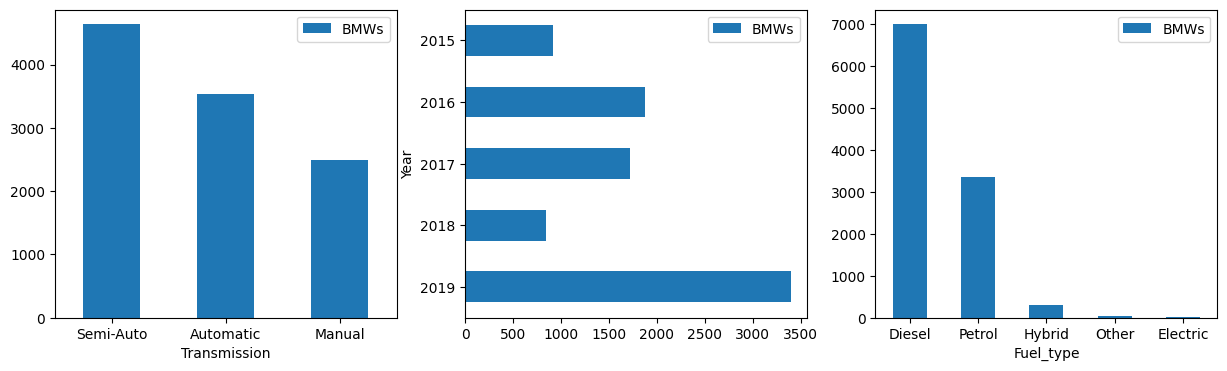

In [16]:
create_subplot(bmw, 1,3, 15, 4)

### Time Series Analysis

In [16]:
bmw.head()

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size,Location
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Spain
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,USA
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,United Kingdom
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,United Kingdom
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,United Kingdom


In [32]:
# group bmw cars based on average price, annual cost of ownership and avg payed tax
bmw_gr = bmw.groupby("Year")[["Price"]].mean()
bmw_gr["Annual_Cost_Ownership"] = bmw.groupby("Year")[["Price"]].sum()
bmw_gr["Tax"] = bmw.groupby("Year")[["Tax"]].mean()
bmw_gr.head()

,Price,Annual_Cost_Ownership,Tax
Year,,,
1996,5995.0,5995,270.00
1997,3950.0,3950,270.00
1998,3950.0,3950,270.00
1999,3285.0,13140,253.75
2000,1624.5,3249,267.50


In [36]:
# plot time series for price
def time_series_analysis(group_data, predictor, target, labels, title, tsax): 
  group_data = group_data.reset_index()
  # plot graph of average price
  sns.lineplot(data=bmw_gr, x=predictor, y=target, ax=tsax)

  # add graph details
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])

  # display plot
  plt.grid()
  plt.title(title)
  plt.show()

Error message 1

In [43]:
# create a subplot
# time series analysis 1: year vs average pics
ts_labels1 = ["Period (Years)", " Average Price($)"]
ts_title1 = "Average Price per year"
time_series_analysis(bmw_gr, "Year", "Price", ts_labels1, ts_title1, ts_plot[0])

# time series analysis 2: year vs annual cost of ownership
ts_labels2 = ["Period (Years)", " Annual Cost($)"]
ts_title2 = "Average Price per year"
time_series_analysis(bmw_gr, "Year", "Price", ts_labels2, ts_title2, ts_plot[1])

# time series analysis 3: year vs average payed tax($)
ts_labels3 = ["Period (Years)", " Average Payed Tax($)"]
ts_title3 = "Average Price per year"
time_series_analysis(bmw_gr, "Year", "Price", ts_labels3, ts_title3, ts_plot[2])

ValueError: too many values to unpack (expected 2)

In [24]:
time_series_analysis().head()

,Year,Price,Annual_Cost_Ownership,Tax
0,1996,5995.0,5995,270.00
1,1997,3950.0,3950,270.00
2,1998,3950.0,3950,270.00
3,1999,3285.0,13140,253.75
4,2000,1624.5,3249,267.50


### Correlation Analysis

In [17]:
bmw.head()

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


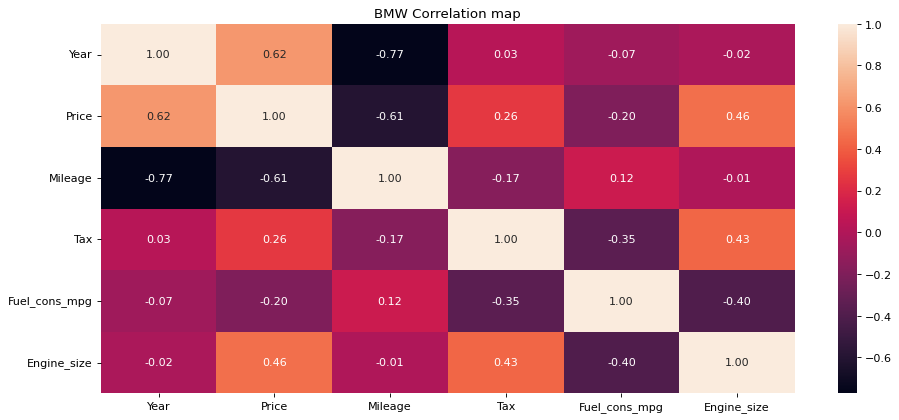

In [18]:
# define correlation analysis function 
def correlation_analysis(data, x,y, zoom_size):
  # create a correlation dataset
  corr_data = data.drop(columns=["Transmission","Model","Fuel_type"])
  corr_data = corr_data.corr()

  # create a correlation map
  plt.figure(figsize=(x,y), dpi=zoom_size)
  sns.heatmap(data=corr_data, annot=True, fmt=".2f")

  # modify correlation map's specification
  plt.title("BMW Correlation map")
  plt.show()

# create correlation analysis
correlation_analysis(bmw, 14,6, 80)


### Feature Engineering

In [19]:
bmw.head()

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Feature 1: Transmission 

In [20]:
# identify transmission data
bmw["Transmission"].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [22]:
# split transmission data into 3 series
transmission = bmw["Transmission"]
bmw["Automatic"] = (transmission == "Automatic")*1
bmw["Manual"] = (transmission == "Manual")*1
bmw["Semi-Auto"] = (transmission == "Semi-Auto")*1

# show data
bmw.head()

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size,Automatic,Manual,Semi-Auto
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,1,0,0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,1,0,0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,1,0,0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,1,0,0
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,1,0,0


In [24]:
# find data summary
bmw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,10664.0,2017.062828,2.350668,1996.0,2016.00,2017.0,2019.0,2020.0
Price,10664.0,22692.888691,11434.921030,1200.0,14897.00,20261.5,27890.0,123456.0
Mileage,10664.0,25710.978995,25146.634940,1.0,5665.75,18783.0,38436.5,214000.0
Tax,10664.0,131.597431,61.611394,0.0,135.00,145.0,145.0,580.0
Fuel_cons_mpg,10664.0,56.483121,31.465604,5.5,45.60,53.3,62.8,470.8
Engine_size,10664.0,2.170161,0.552556,0.0,2.00,2.0,2.0,6.6
Automatic,10664.0,0.332146,0.471005,0.0,0.00,0.0,1.0,1.0
Manual,10664.0,0.233027,0.422779,0.0,0.00,0.0,0.0,1.0
Semi-Auto,10664.0,0.434827,0.495758,0.0,0.00,0.0,1.0,1.0


Feature 2: Fuel Type

In [35]:
# find distinct fuel types
fuel_type_data = bmw["Fuel_type"].value_counts().to_frame()
fuel_type_data = fuel_type_data.reset_index()
fuel_type_data["Class"] = pd.Series(np.arange(1,6))
fuel_type_data

,Fuel_type,count,Class
0,Diesel,6988,1
1,Petrol,3340,2
2,Hybrid,297,3
3,Other,36,4
4,Electric,3,5


In [36]:
# convert fuel type into numeric data 
bmw["Fuel_type"] = bmw["Fuel_type"].apply(lambda ftype: 1 if ftype=="Diesel" else ftype)
bmw["Fuel_type"] = bmw["Fuel_type"].apply(lambda ftype: 2 if ftype=="Petrol" else ftype)

bmw["Fuel_type"] = bmw["Fuel_type"].apply(lambda ftype: 3 if ftype=="Hybrid" else ftype)
bmw["Fuel_type"] = bmw["Fuel_type"].apply(lambda ftype: 4 if ftype=="Other" else ftype)
bmw["Fuel_type"] = bmw["Fuel_type"].apply(lambda ftype: 5 if ftype=="Electric" else ftype)

In [37]:
bmw.head()

,Model,Year,Price,Transmission,Mileage,Fuel_type,Tax,Fuel_cons_mpg,Engine_size,Automatic,Manual,Semi-Auto
0,5 Series,2014,11200,Automatic,67068,1,125,57.6,2.0,1,0,0
1,6 Series,2018,27000,Automatic,14827,2,145,42.8,2.0,1,0,0
2,5 Series,2016,16000,Automatic,62794,1,160,51.4,3.0,1,0,0
3,1 Series,2017,12750,Automatic,26676,1,145,72.4,1.5,1,0,0
4,7 Series,2014,14500,Automatic,39554,1,160,50.4,3.0,1,0,0


In [38]:
bmw["Fuel_type"].unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [39]:
# save dataset 
bmw.to_csv("bmw_numeric_dataset.csv")